<a href="https://colab.research.google.com/github/19PA1A0562/covid/blob/main/New_Prioritize_vaccine_delivery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem statement :
As the country gears up to unveil, register and approve its choice of vaccine candidates against COVID-19, the first set of population expected to be immunized may be frontline health workers, doctors, people over 50 years of age and people with co-morbidities. The challenge for healthcare administrators would be  prioritizing within this population, considering limited availability of vaccines initially.

# Solution : 
To provide predictive model to find the most affected people who are suffering from covid-19 to supply vaccine first to required people who might be in critical status(present people suffering from covid, frontline health workers, doctors, people over 50 years of age and people with co-morbidities) and then for the remaining people based on vaccine production status

**Solution Approach** :

**Data Collection** :

Here we have to collect data from various sources in order to analysis the data so that we can train our model to prioritize the locations(by clustering) for vaccine delivery. For that we have to gather real-world data from various sources

Gather the data based on covid-19 from states and central resources and health survey information in India



1.   https://www.kaggle.com/imdevskp/covid19-corona-virus-india-dataset?select=patients_data.csv
2.   https://www.kaggle.com/imdevskp/corona-virus-report These are the datasets we refered till now



**Data Analysis** :

To find the hidden patterns and relationship between features



*   Feature engineering and Feature selection : Selecting the best features that are more correlated to find the target label.
*   Machine Learning Models : Train the data on multiple clustering models (K-means, Hierarchical clustering) with hyper parameters.


*   Evaluate ranking algorithm : Evaluate a ranking algorithm to prioritize the clusters(locations). This includes several attributes, as clearly mentioned in solution approach above for prioritizing
*    Prediction : Supply the vaccine in the area, which was clustered with the more of covid cases, frontline health workers, doctors, people over 50 years of age and people with co-morbidities (by considering various discussed attributes)





**importing packages**


---



In [2]:
# importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
from statistics import mode
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
# loading all the required datasets
d1 = pd.read_csv('raw_data1.csv')
d2 = pd.read_csv('raw_data2.csv')
d3 = pd.read_csv('raw_data3.csv')
d4 = pd.read_csv('raw_data4.csv')
d5 = pd.read_csv('raw_data5.csv')
d6 = pd.read_csv('raw_data6.csv')
d7 = pd.read_csv('raw_data7.csv')
d8 = pd.read_csv('raw_data8.csv')
d9 = pd.read_csv('raw_data9.csv')
d10 = pd.read_csv('raw_data10.csv')
d11 = pd.read_csv('raw_data11.csv')
d12 = pd.read_csv('raw_data12.csv')
d13 = pd.read_csv('raw_data13.csv')
d14 = pd.read_csv('raw_data14.csv')
d15 = pd.read_csv('raw_data15.csv')
d16 = pd.read_csv('raw_data16.csv')
d17 = pd.read_csv('raw_data17.csv')
d18 = pd.read_csv('raw_data18.csv')
d19 = pd.read_csv('raw_data19.csv')
d20 = pd.read_csv('raw_data20.csv')
d21 = pd.read_csv('raw_data21.csv')

In [ ]:
data = [d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14,d15,d16,d17,d18,d19,d20,d21]

**Required Data Set**

---



In [ ]:
# creating the required dataset
final_data = pd.concat(data)
final_data.head()

,Patient Number,State Patient Number,Date Announced,Estimated Onset Date,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Current Status,Notes,Contracted from which Patient (Suspected),Nationality,Type of transmission,Status Change Date,Source_1,Source_2,Source_3,Backup Notes,Num Cases,Entry_ID
0,1.0,KL-TS-P1,30/01/2020,NaN,20,F,Thrissur,Thrissur,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan,1.0,NaN
1,2.0,KL-AL-P1,02/02/2020,NaN,NaN,NaN,Alappuzha,Alappuzha,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan,1.0,NaN
2,3.0,KL-KS-P1,03/02/2020,NaN,NaN,NaN,Kasaragod,Kasaragod,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan,1.0,NaN
3,4.0,DL-P1,02/03/2020,NaN,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,DL,Recovered,"Travelled from Austria, Italy",NaN,India,Imported,15/03/2020,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,NaN,Travel history to Italy and Austria,1.0,NaN
4,5.0,TS-P1,02/03/2020,NaN,24,M,Hyderabad,Hyderabad,Telangana,TG,Recovered,"Travelled from Dubai to Bangalore on 20th Feb,...",NaN,India,Imported,02/03/2020,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,"Travel history to Dubai, Singapore contact",1.0,NaN


In [ ]:
# shape of our final dataset
final_data.shape

(472234, 22)

In [ ]:
# number of missing values in the features
final_data.isna().sum()

Patient Number                               372441
State Patient Number                         358061
Date Announced                                   35
Estimated Onset Date                         472234
Age Bracket                                  354909
Gender                                       352641
Detected City                                457802
Detected District                             12390
Detected State                                   50
State code                                       53
Current Status                                   41
Notes                                        355383
Contracted from which Patient (Suspected)    470296
Nationality                                  470680
Type of transmission                         469244
Status Change Date                           444454
Source_1                                       6307
Source_2                                     458765
Source_3                                     471384
Backup Notes

In [ ]:
#performing feature selection
del final_data["State Patient Number"]
del final_data["Date Announced"]
del final_data["Estimated Onset Date"]
del final_data["State code"]
del final_data["Source_1"]
del final_data["Source_2"]
del final_data["Source_3"]
del final_data["Num Cases"]
del final_data["Status Change Date"]
del final_data["Notes"]
del final_data["Contracted from which Patient (Suspected)"]

In [ ]:
# shape of the data after Feature selection
final_data.shape

(472234, 11)

In [ ]:
final_data['Age Bracket'].fillna(0)

0        20
1         0
2         0
3        45
4        24
         ..
15581     0
15582     0
15583     0
15584     0
15585     0
Name: Age Bracket, Length: 472234, dtype: object

In [ ]:
# Type casting the features
final_data['Age Bracket'] = pd.to_numeric(final_data['Age Bracket'], errors = "coerce" )
final_data.dtypes

Patient Number          float64
Age Bracket             float64
Gender                   object
Detected City            object
Detected District        object
Detected State           object
Current Status           object
Nationality              object
Type of transmission     object
Backup Notes             object
Entry_ID                float64
dtype: object

In [ ]:
# finding the mean value of age
average = np.mean(final_data['Age Bracket'])
average

40.02285876255263

In [ ]:
# replacing nan values with the average
final_data['Age Bracket'] = final_data['Age Bracket'].replace(np.nan, average)

In [ ]:
# obtaining data types of required featuers
final_data.dtypes

Patient Number          float64
Age Bracket             float64
Gender                   object
Detected City            object
Detected District        object
Detected State           object
Current Status           object
Nationality              object
Type of transmission     object
Backup Notes             object
Entry_ID                float64
dtype: object

In [ ]:
# displaying a sample of our data after pre processing the data
final_data.head()

,Patient Number,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Nationality,Type of transmission,Backup Notes,Entry_ID
0,1.0,20.000000,F,Thrissur,Thrissur,Kerala,Recovered,India,Imported,Student from Wuhan,NaN
1,2.0,40.022859,NaN,Alappuzha,Alappuzha,Kerala,Recovered,India,Imported,Student from Wuhan,NaN
2,3.0,40.022859,NaN,Kasaragod,Kasaragod,Kerala,Recovered,India,Imported,Student from Wuhan,NaN
3,4.0,45.000000,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,India,Imported,Travel history to Italy and Austria,NaN
4,5.0,24.000000,M,Hyderabad,Hyderabad,Telangana,Recovered,India,Imported,"Travel history to Dubai, Singapore contact",NaN


In [ ]:
# filling the missing values in the patient number feature
final_data['Patient Number'].fillna(0)

0        1.0
1        2.0
2        3.0
3        4.0
4        5.0
        ... 
15581    0.0
15582    0.0
15583    0.0
15584    0.0
15585    0.0
Name: Patient Number, Length: 472234, dtype: float64

In [ ]:
# Type casting the patient number feature
final_data['Patient Number'] = pd.to_numeric(final_data['Patient Number'], errors = "coerce" )

In [ ]:
average1 = np.mean(final_data['Patient Number'])
average1

50683.78917358933

In [ ]:
# replacing the nan values with average 
final_data['Patient Number'] = final_data['Patient Number'].replace(np.nan, average1)

In [ ]:
final_data.dtypes

Patient Number          float64
Age Bracket             float64
Gender                   object
Detected City            object
Detected District        object
Detected State           object
Current Status           object
Nationality              object
Type of transmission     object
Backup Notes             object
Entry_ID                float64
dtype: object

In [ ]:
# final data after preprocessing
final_data.head()

,Patient Number,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Nationality,Type of transmission,Backup Notes,Entry_ID
0,1.0,20.000000,F,Thrissur,Thrissur,Kerala,Recovered,India,Imported,Student from Wuhan,NaN
1,2.0,40.022859,NaN,Alappuzha,Alappuzha,Kerala,Recovered,India,Imported,Student from Wuhan,NaN
2,3.0,40.022859,NaN,Kasaragod,Kasaragod,Kerala,Recovered,India,Imported,Student from Wuhan,NaN
3,4.0,45.000000,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,India,Imported,Travel history to Italy and Austria,NaN
4,5.0,24.000000,M,Hyderabad,Hyderabad,Telangana,Recovered,India,Imported,"Travel history to Dubai, Singapore contact",NaN


In [ ]:
# no.of na values in the data 
final_data.isna().sum()

Patient Number               0
Age Bracket                  0
Gender                  352641
Detected City           457802
Detected District        12390
Detected State              50
Current Status              41
Nationality             470680
Type of transmission    469244
Backup Notes            471873
Entry_ID                 28187
dtype: int64

In [ ]:
final_data['Patient Number'] = final_data['Patient Number'].astype(str)

In [ ]:
final_data.dtypes

Patient Number           object
Age Bracket             float64
Gender                   object
Detected City            object
Detected District        object
Detected State           object
Current Status           object
Nationality              object
Type of transmission     object
Backup Notes             object
Entry_ID                float64
dtype: object

In [ ]:
# Obtaining latitude and longitude values of states
# Retreiving Latitude and Longitude coordinates
info = pd.read_html("http://www.quickgs.com/latitudinal-and-longitudinal-extents-of-india-indian-states-and-cities/") 
# convering the table data into DataFrame
coordinates = pd.DataFrame(info[0])
coordinates

,State,Latitude,Longitude
0,Andhra Pradesh,15.91°N,79.74°E
1,Arunachal Pradesh,28.21°N,94.72°E
2,Assam,26.20°N,92.93°E
3,Bihar,25.09°N,85.31°E
4,Chhattisgarh,21.27°N,81.86°E
5,Goa,15.29°N,74.12°E
6,Gujarat,22.25°N,71.19°E
7,Haryana,29.05°N,76.08°E
8,Himachal Pradesh,31.10°N,77.17°E
9,Jammu & Kashmir,33.77 °N,76.57°E


**Exploratory Data Analysis** :


---



In [3]:
# loading the dataset for exploratory data analysis
df = pd.read_csv("district_wisenew (1).csv")
df.head()

,SlNo,State_Code,State,District_Key,District,Confirmed,Active,Recovered,Deceased,Age above 50,Doctors,Front line workers,people suffering from diseases,Migrated_Other,Delta_Confirmed,Delta_Active,Delta_Recovered,Delta_Deceased,District_Notes,Last_Updated
0,0.0,UN,State Unassigned,UN_Unassigned,Unassigned,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,1.0,AN,Andaman and Nicobar Islands,AN_Nicobars,Nicobars,0.0,0.0,0.0,0.0,35000.0,150.0,5645.0,NaN,0.0,0.0,0.0,0.0,0.0,District-wise numbers are out-dated as cumulat...,NaN
2,2.0,AN,Andaman and Nicobar Islands,AN_North and Middle Andaman,North and Middle Andaman,1.0,0.0,1.0,0.0,76788.0,200.0,5646.0,NaN,0.0,0.0,0.0,0.0,0.0,District-wise numbers are out-dated as cumulat...,NaN
3,3.0,AN,Andaman and Nicobar Islands,AN_South Andaman,South Andaman,51.0,19.0,32.0,0.0,96767.0,345.0,5666.0,NaN,0.0,0.0,0.0,0.0,0.0,District-wise numbers are out-dated as cumulat...,NaN
4,0.0,AP,Andhra Pradesh,AP_Foreign Evacuees,Foreign Evacuees,434.0,0.0,434.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [4]:
# performing feature selection for EDA
del df["SlNo"]
del df["Migrated_Other"]
del df["Delta_Confirmed"]
del df['Delta_Deceased']
del df["Delta_Active"]
del df['Delta_Recovered']
del df['District_Notes']
del df["Last_Updated"]

In [5]:
# no.of rows anf columns of dataset
df.shape

(803, 12)

In [6]:
# finding wether there are missing values or not
df.isna().any()

State_Code                        True
State                             True
District_Key                      True
District                          True
Confirmed                         True
Active                            True
Recovered                         True
Deceased                          True
Age above 50                      True
Doctors                           True
Front line workers                True
people suffering from diseases    True
dtype: bool

In [7]:
# no.of missing values in the features
df.isna().sum()

State_Code                        38
State                             38
District_Key                      38
District                          38
Confirmed                         38
Active                            38
Recovered                         38
Deceased                          38
Age above 50                      53
Doctors                           51
Front line workers                44
people suffering from diseases    46
dtype: int64

In [8]:
# filling nan values with forward fill option
df = df.fillna(method='ffill')

In [9]:
# verifying wether there are missing values or not
df.isna().any()

State_Code                        False
State                             False
District_Key                      False
District                          False
Confirmed                         False
Active                            False
Recovered                         False
Deceased                          False
Age above 50                      False
Doctors                            True
Front line workers                 True
people suffering from diseases     True
dtype: bool

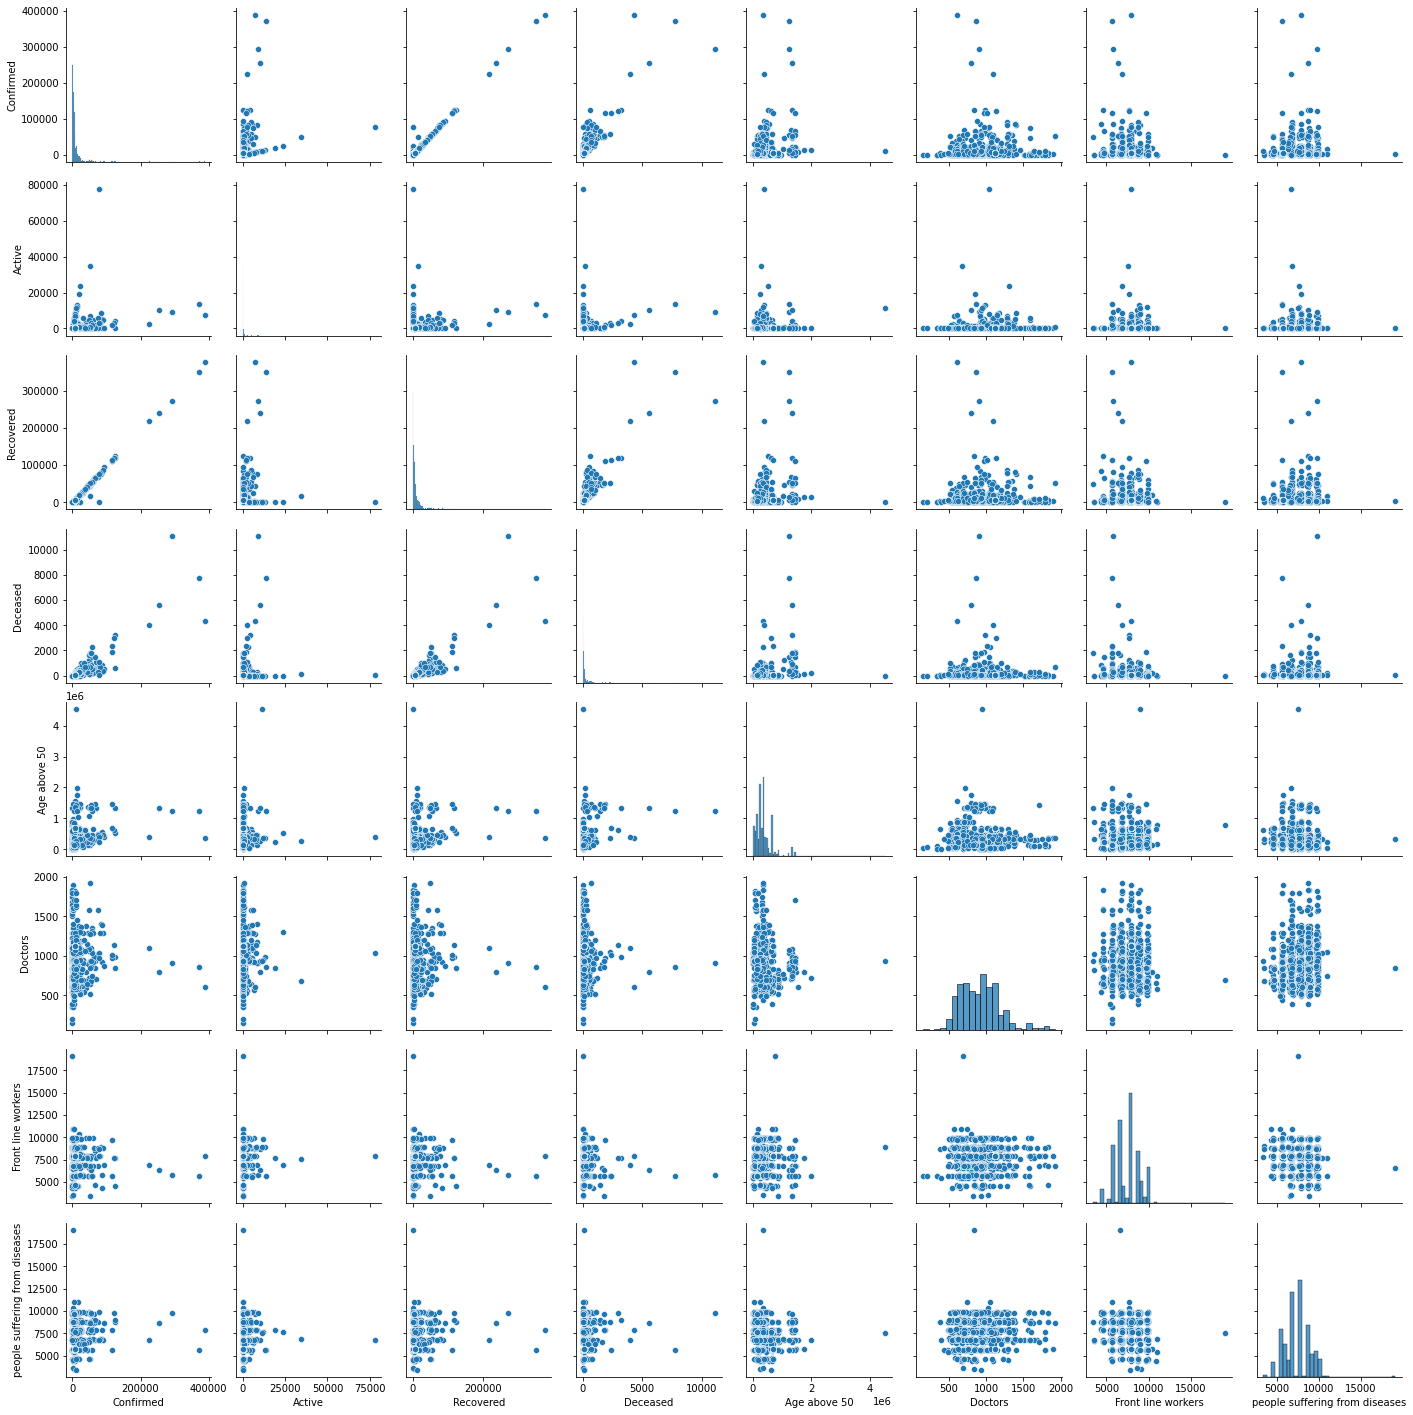

In [10]:
# performing pair plot which plots scatter plot between given features
sns.pairplot(df)

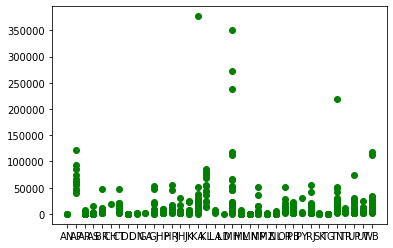

In [ ]:
# performing scatter plot between states and recovered cases
x= df['State_Code']
y= df['Recovered']
plt.scatter(x,y,color='g')

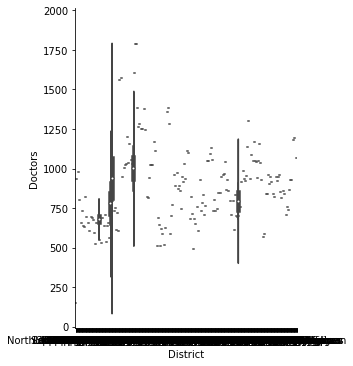

In [ ]:
# performing catplot between district and doctor
sns.catplot(x="District",y="Doctors", data=df, kind="violin")

In [ ]:
# installing geopandas for obtaining the india map
pip install geopandas

     |████████████████████████████████| 972kB 5.7MB/s 
     |████████████████████████████████| 14.8MB 304kB/s 
     |████████████████████████████████| 6.5MB 44.0MB/s 


In [ ]:
from geopandas import GeoDataFrame, read_file
# reading the shp files for obtaining india map
map_data = read_file('Indian_States.shp')
map_data.rename(columns = {"st_nm":"States/UT"}, inplace = True)
map_data.head()

,States/UT,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


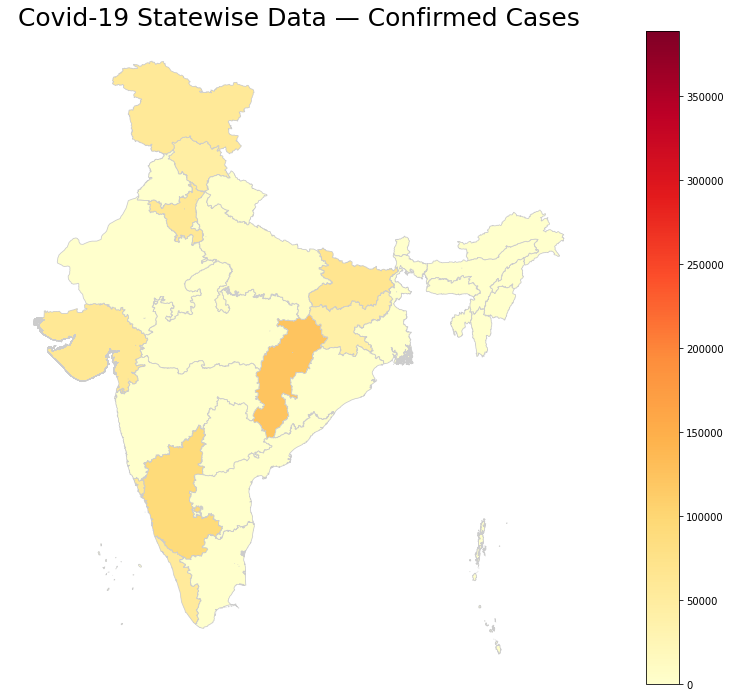

In [ ]:
# plotting the india map along with covid19 confirmed cases density
fig, ax = plt.subplots(1, figsize=(20, 12))
ax.axis("off")

df = GeoDataFrame(df, geometry= map_data['geometry'] )
ax.set_title("Covid-19 Statewise Data — Confirmed Cases", 
             fontdict =  {"fontsize" : "25", "fontweight" : "3"})
df.plot(column = "Confirmed", cmap="YlOrRd", 
                 linewidth=0.8, ax=ax, edgecolor="0.8", legend = True)
plt.show()

In [11]:
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium import plugins
# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12
# Disable warnings
import warnings
warnings.filterwarnings('ignore')

In [176]:
India_coord = pd.read_excel('/content/Indian Coordinates.xlsx')
India_coord.rename(columns={'Name of State / UT':'State'}, inplace=True)
India_coord1 = India_coord.sort_values(by = 'State') 
India_coord1

,State,Latitude,Longitude
0,Andaman and Nicobar Islands,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973
5,Chandigarh,30.719997,76.780006
6,Chhattisgarh,22.090420,82.159987
7,Dadra and Nagar Haveli and Daman and Diu,20.266578,73.016618
8,Delhi,28.669993,77.230004
9,Goa,15.491997,73.818001


In [181]:
state_data = pd.read_csv("/content/state_level_latest.csv")
state_data.drop([36],inplace=True)
state_data.drop(state_data.head(1).index,inplace=True)
state_data = state_data.sort_values(by = 'State') 
#state_data.set_index('id', inplace=True)
state_data

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes
35,Andaman and Nicobar Islands,1123,355,16,752,06/08/2020 20:45:08,0,AN,0,0,0,NaN
5,Andhra Pradesh,196789,112870,1753,82166,06/08/2020 19:45:03,0,AP,0,0,0,Total includes patients from other states and ...
29,Arunachal Pradesh,1948,1245,3,700,06/08/2020 23:17:40,0,AR,0,0,0,[July 25]: All numbers corresponding to Papum ...
13,Assam,52818,37225,126,15464,06/08/2020 23:00:49,3,AS,0,0,0,Includes 1 case from Nagaland
11,Bihar,68148,43820,388,23939,06/08/2020 17:29:43,1,BR,0,0,0,NaN
30,Chandigarh,1327,777,20,529,06/08/2020 18:11:05,1,CH,0,0,0,NaN
20,Chhattisgarh,11020,8088,77,2855,06/08/2020 23:00:55,0,CT,0,0,0,NaN
31,Dadra and Nagar Haveli and Daman and Diu,1415,997,2,406,06/08/2020 20:07:54,10,DN,0,0,0,NaN
3,Delhi,141531,127124,4059,10348,06/08/2020 18:39:45,0,DL,0,0,0,[July 14]: Value for the total tests conducted...
22,Goa,7614,5453,66,2095,06/08/2020 19:39:50,0,GA,0,0,0,NaN


In [182]:
df_full = pd.merge(state_data,India_coord,on="State")
df_full

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes,Latitude,Longitude
0,Andaman and Nicobar Islands,1123,355,16,752,06/08/2020 20:45:08,0,AN,0,0,0,NaN,11.667026,92.735983
1,Andhra Pradesh,196789,112870,1753,82166,06/08/2020 19:45:03,0,AP,0,0,0,Total includes patients from other states and ...,14.750429,78.570026
2,Bihar,68148,43820,388,23939,06/08/2020 17:29:43,1,BR,0,0,0,NaN,25.785414,87.479973
3,Chandigarh,1327,777,20,529,06/08/2020 18:11:05,1,CH,0,0,0,NaN,30.719997,76.780006
4,Chhattisgarh,11020,8088,77,2855,06/08/2020 23:00:55,0,CT,0,0,0,NaN,22.090420,82.159987
5,Delhi,141531,127124,4059,10348,06/08/2020 18:39:45,0,DL,0,0,0,[July 14]: Value for the total tests conducted...,28.669993,77.230004
6,Gujarat,67811,50524,2579,14708,06/08/2020 21:28:40,0,GJ,0,0,0,NaN,22.258700,71.192400
7,Haryana,39303,32640,458,6205,06/08/2020 20:29:05,0,HR,0,0,0,[Aug 2]: 21 Foreign Evacuees have been merged ...,28.450006,77.019991
8,Jammu and Kashmir,23454,15708,436,7310,06/08/2020 18:19:43,0,JK,0,0,0,NaN,33.450000,76.240000
9,Karnataka,158254,80281,2897,75067,06/08/2020 21:19:51,9,KA,0,0,0,NaN,12.570381,76.919997


In [186]:
map = folium.Map(location=[20, 70], zoom_start=4,tiles='Stamenterrain')
for lat, lon, value, name in zip(df_full['Latitude'], df_full['Longitude'], df_full['Confirmed'], df_full['State']):
   folium.CircleMarker([lat, lon], radius=value*0.00008, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>'
   '<strong>Total Cases</strong>: ' + str(value) + '%' ),color='red',fill_color='red',fill_opacity=0.3 ).add_to(map)
map

In [ ]:
# importing plotly package used for building interactive charts
import plotly.express as px

In [ ]:
bar_data = df.groupby(['State'])['Confirmed','Deceased', 'Recovered'].sum().reset_index()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
# plotting the graph between states and deceased cases
fig = px.bar(bar_data, x="State", y="Deceased", color='State', text = 'Deceased', orientation='v', height=600,width=1000,
             title='Deceased Cases')
fig.show()

**With the help of graph we can understand that Maharastra is having more number of people who are died due to covid**

In [ ]:
# plotting the graph between states and recovered cases
fig = px.bar(bar_data, x="State", y="Recovered", color='State', text = 'Recovered', orientation='v', height=600,width=1000,
             title='Recovered Cases')
fig.show()

**With the help of graph we can understand that Maharastra is having more number of people who are recovered from covid**

In [ ]:
# plot for total number of covid cases in india
fig = px.pie(df, values = 'Confirmed',names='District', height=600,title="CORONA CASES IN INDIA")
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.update_layout(
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
    ))

fig.show()

**From the above graph on hovering we can know confirmed cases in that particular place**

In [ ]:
# plotting the confirmed,recovered,deceased cases of all the states
line_data = df.groupby('State').sum().reset_index()

line_data = line_data.melt(id_vars='State', 
                 value_vars=['Confirmed', 
                             'Recovered', 
                             'Deceased'], 
                 var_name='Ratio', 
                 value_name='Value')

fig = px.line(line_data, x="State", y="Value", color='Ratio', 
              title='Confirmed cases, Recovered cases, and Deceased')
fig.show()

**Plot showing all the three measures confirmed,recovered,deceased**

In [ ]:
bar_data = df.groupby(['State'])['Confirmed','Deceased', 'Recovered'].sum().reset_index()

fig = px.bar(bar_data, x="State", y="Confirmed",color="State", text = 'Confirmed', orientation='v', height=600,width=1000,
             title='CORONA CASES IN INDIA')
fig.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
# reading the dataset to perform some kind of EDA
dia = pd.read_csv("/content/india_covid_19_state_wise_info.csv")
dia.head()

,sl_no,state_ut,confirmed_cases,active_cases,recovered_cases,death_cases
0,2,Andaman and Nicobar Islands,3712,166,3494,52
1,1,Andhra Pradesh,646530,70357,570667,5506
2,3,Arunachal Pradesh,8133,2216,5903,14
3,4,Assam,163491,30182,132712,597
4,5,Bihar,172854,12958,159022,874


In [ ]:
# calculating total number of active,recovered,deceased cases in india
india_recovered = dia["recovered_cases"].sum()
india_deaths = dia["death_cases"].sum()
india_active = dia["active_cases"].sum()

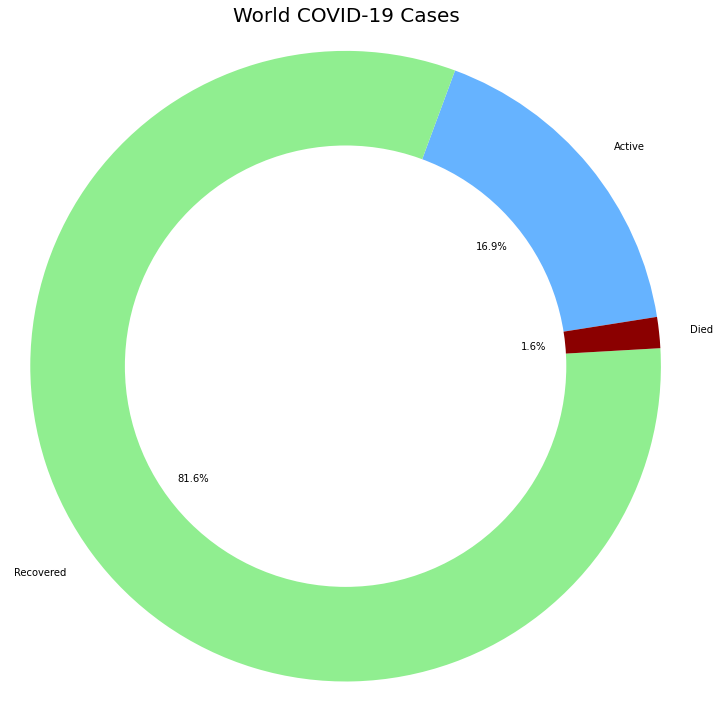

In [ ]:
# Drawing a pie chart showing percentage of people recovered,active,deceased
labels = ['Active','Recovered','Died']
sizes = [india_active,india_recovered,india_deaths]
color= ['#66b3ff','lightgreen','darkred']
plt.figure(figsize= (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9,colors = color)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('World COVID-19 Cases',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()

**We can see from above graph that the number of recovered people are more while comparing to active and deceased cases**

In [ ]:
# reading the dataset to perform some sort of EDA
dst = pd.read_csv("/content/Provisional_COVID-19_Deaths__Focus_on_Ages_0-18_Years.csv")
dst.head()

,Data as of,Age group,COVID-19 Deaths,Indicator,Sex,Race or Hispanic Origin Group,Start Week,End Week
0,12/30/2020,0-4 years,51,Age,All,All,2/1/2020,12/26/2020
1,12/30/2020,5-18 years,126,Age,All,All,2/1/2020,12/26/2020
2,12/30/2020,19-44 years,7899,Age,All,All,2/1/2020,12/26/2020
3,12/30/2020,45-64 years,50470,Age,All,All,2/1/2020,12/26/2020
4,12/30/2020,65-74 years,64364,Age,All,All,2/1/2020,12/26/2020


In [ ]:
# performing feature selection as we dont need this features
del dst["Data as of"]
del dst["Indicator"]
del dst["Race or Hispanic Origin Group"]
del dst["Start Week"]
del dst["End Week"]
del dst["Sex"]

In [ ]:
# Obtaining required data by dividing them into age cateogories
l =[]
var = dst[dst["Age group"]=="0-4 years"]
l.append(sum(var["COVID-19 Deaths"]))
var = dst[dst["Age group"]=="5-18 years"]
l.append(sum(var["COVID-19 Deaths"]))
var = dst[dst["Age group"]=="19-44 years"]
l.append(sum(var["COVID-19 Deaths"]))
var = dst[dst["Age group"]=="45-64 years"]
l.append(sum(var["COVID-19 Deaths"]))
var = dst[dst["Age group"]=="65-74 years"]
l.append(sum(var["COVID-19 Deaths"]))
var = dst[dst["Age group"]==">75 years"]
l.append(sum(var["COVID-19 Deaths"]))
l

[204, 504, 7899, 50470, 64364, 178778]

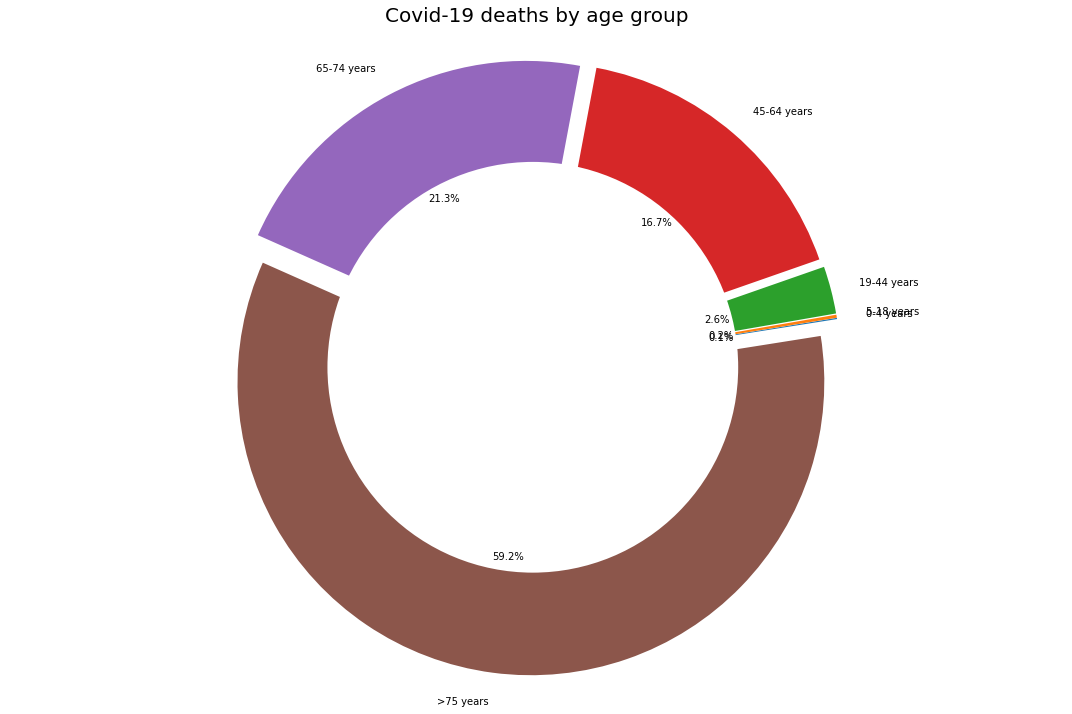

In [ ]:
# drawing a pie chart showing percentage of people died in respective age groups
lab = dst.head(6)
labels = list(lab['Age group'])
sizes = l
explode = []

for i in labels:
    explode.append(0.05)


plt.figure(figsize= (15,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, explode =explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Covid-19 deaths by age group',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()

**We can say people with age greater than 75 have died most due to covid19**

In [ ]:
import plotly.express as px
import plotly.express as ex

In [ ]:
fig = px.bar(dia[['state_ut', 'confirmed_cases']].sort_values('confirmed_cases', ascending=False), 
             x="confirmed_cases", y="state_ut", color='state_ut',color_discrete_sequence = ex.colors.cyclical.IceFire
              ,title='Confirmed cases in states of india',orientation='h')
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)')
fig.update_traces(textposition='inside')
# fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_layout(barmode='stack')
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',yaxis_title='States',xaxis_title='confirmed cases')
fig.update_layout(template = 'plotly_white')
fig.show()

**A graph visually showing the confirmed cases from all the states in descending order**

In [ ]:
import plotly.graph_objs as go

In [ ]:
dsi = dia.sort_values('recovered_cases', ascending=True)
fig1 = go.Figure(data=[
go.Bar(name='Active', y=dsi['state_ut'], x=dsi['active_cases'], 
       orientation='h',marker_color='#0f5dbd'),
    go.Bar(name='Recovered', y=dsi['state_ut'], x=dsi['recovered_cases'], 
       orientation='h',marker_color='#319146'),
go.Bar(name='Died', y=dsi['state_ut'], x=dsi['death_cases'], 
       orientation='h',marker_color='#e03216')])
fig1.update_layout(barmode='stack',width=600, height=800)
fig.update_traces(textposition='inside')
#fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig1.update_layout(title_text='Active Cases,Recovered,Deaths in Different States of India',
                  plot_bgcolor='rgb(275, 270, 273)')
fig1.show()

**A graph visually showing the active cases,recovered cases,deceased cases from all the states in descending order**

**Ranking among states for vaccine delivery**


---



In [ ]:
# loading datset which should be ranked
ds = pd.read_csv("india_covid_19_state_wise_info.csv")
ds.head()

,sl_no,state_ut,confirmed_cases,active_cases,recovered_cases,death_cases
0,2,Andaman and Nicobar Islands,3712,166,3494,52
1,1,Andhra Pradesh,646530,70357,570667,5506
2,3,Arunachal Pradesh,8133,2216,5903,14
3,4,Assam,163491,30182,132712,597
4,5,Bihar,172854,12958,159022,874


In [ ]:
ds1 = ds

In [ ]:
# finidng wethere there area any missing values
ds.isna().any()

sl_no              False
state_ut           False
confirmed_cases    False
active_cases       False
recovered_cases    False
death_cases        False
dtype: bool

In [ ]:
from sklearn.linear_model import LogisticRegression 

In [ ]:
model = LogisticRegression()
x = ds1[["active_cases","recovered_cases","death_cases"]]
y = ds1["state_ut"]
model.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = model.predict(x)
y_pred

array(['Lakshadweep', 'Maharashtra', 'Lakshadweep', 'Kerala', 'Bihar',
       'Lakshadweep', 'Chhattisgarh', 'Lakshadweep', 'Tamil Nadu',
       'Lakshadweep', 'Lakshadweep', 'Lakshadweep', 'Lakshadweep',
       'Lakshadweep', 'Lakshadweep', 'Maharashtra', 'Kerala',
       'Lakshadweep', 'Lakshadweep', 'Lakshadweep', 'Maharashtra',
       'Lakshadweep', 'Lakshadweep', 'Lakshadweep', 'Lakshadweep',
       'Andhra Pradesh', 'Lakshadweep', 'Lakshadweep', 'Lakshadweep',
       'Lakshadweep', 'Maharashtra', 'Odisha', 'Lakshadweep',
       'Lakshadweep', 'Maharashtra', 'Tamil Nadu'], dtype=object)

In [ ]:
# Normalizing the data 
def apply():
  ds1["death_cases"] = ds1["death_cases"]/np.max(ds1["death_cases"])
  ds1["active_cases"] = ds1["active_cases"]/np.max(ds1["active_cases"])
  ds1["recovered_cases"] = ds1["recovered_cases"]/np.max(ds1["recovered_cases"])
apply()

In [ ]:
# Normalized data
ds1.head()

,sl_no,state_ut,confirmed_cases,active_cases,recovered_cases,death_cases,probability
0,2,Andaman and Nicobar Islands,3712,0.000606,0.003655,0.001535,0.000179
1,1,Andhra Pradesh,646530,0.256887,0.596913,0.162486,0.054965
2,3,Arunachal Pradesh,8133,0.008091,0.006174,0.000413,0.000507
3,4,Assam,163491,0.110200,0.138816,0.017618,0.012411
4,5,Bihar,172854,0.047312,0.166336,0.025792,0.006351


In [ ]:
# Applying mathematical equation to derive results
ratio = ds["death_cases"]/(ds["death_cases"]+ds["recovered_cases"])
actrat = ratio*ds["active_cases"]
# checking wether there are any missing values in the resulting data
actrat = actrat.replace(to_replace=np.nan,value=0.0)
actrat.isna().any()

False

In [ ]:
ds["probability"] = actrat

In [ ]:
ds.head()

,sl_no,state_ut,confirmed_cases,active_cases,recovered_cases,death_cases,probability
0,2,Andaman and Nicobar Islands,3712,0.000606,0.003655,0.001535,0.000179
1,1,Andhra Pradesh,646530,0.256887,0.596913,0.162486,0.054965
2,3,Arunachal Pradesh,8133,0.008091,0.006174,0.000413,0.000507
3,4,Assam,163491,0.110200,0.138816,0.017618,0.012411
4,5,Bihar,172854,0.047312,0.166336,0.025792,0.006351


In [ ]:
# generating ranks for all the states and union teritories
rank = np.arange(1,37)
rank

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36])

In [ ]:
# sorting the data based on the probability
ds = ds.sort_values(by=['probability'],ascending=False)
del ds["sl_no"]

In [ ]:
ds.reset_index(drop=True, inplace=True)
ds.head()

,sl_no,state_ut,confirmed_cases,active_cases,recovered_cases,death_cases,probability
0,2,Andaman and Nicobar Islands,3712,0.000606,0.003655,0.001535,0.000179
1,1,Andhra Pradesh,646530,0.256887,0.596913,0.162486,0.054965
2,3,Arunachal Pradesh,8133,0.008091,0.006174,0.000413,0.000507
3,4,Assam,163491,0.110200,0.138816,0.017618,0.012411
4,5,Bihar,172854,0.047312,0.166336,0.025792,0.006351


In [ ]:
# Assigning ranks to states
ds["ranking"] = rank
ds.head()

,state_ut,confirmed_cases,active_cases,recovered_cases,death_cases,probability,ranking
0,Maharashtra,1263799,1.000000,1.000000,1.000000,0.500000,1
1,Karnataka,540847,0.345662,0.458050,0.243936,0.120115,2
2,Uttar Pradesh,369686,0.225271,0.316610,0.156377,0.074478,3
3,Tamil Nadu,557999,0.168864,0.525862,0.265892,0.056709,4
4,Andhra Pradesh,646530,0.256887,0.596913,0.162486,0.054965,5


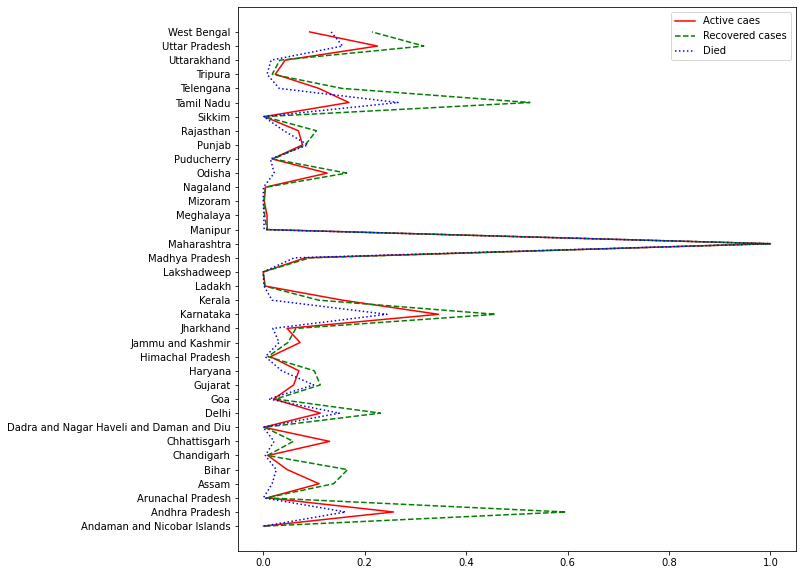

In [ ]:
# A plot between active,recovered,died cases with all states in india
y = ds1["state_ut"]
plt.figure(figsize= (10,10))
plt.plot(ds1["active_cases"],y,"r",label="Active caes")
plt.plot(ds1["recovered_cases"],y,"g",label ="Recovered cases",linestyle="--")
plt.plot(ds1["death_cases"],y,"b",label="Died",linestyle=":")
plt.legend()

<h1>Conclusion:</h1>

**The vaccine should 1st deliver to Maharashtra**